In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Largest-Malls.csv")
df.head()

,Rank,Mall,Country,City (metropolitan area),Year opened,Gross leasable area (GLA),Shops
0,1,Iran Mall,Iran,Tehran,2018,"1,950,000 m2 (21,000,000 sq ft)","2,500"
1,2,IOI City Mall,Malaysia,Putrajaya,2014,"821,000 m2 (8,840,000 sq ft)",650
2,3,South China Mall,China,Dongguan,2005,"659,612 m2 (7,100,000 sq ft)","2,350"
3,4,Isfahan City Center,Iran,Isfahan,2012,"650,000 m2 (7,000,000 sq ft)",350
4,5,SM Mall of Asia,Philippines,Pasay (Metro Manila),2006,"589,891 m2 (6,349,530 sq ft)","3,500"


# 1) Data Cleaning.

*Handle with missed data, reformat string columns "Year Opened", "Gross leasable area (GLA)" and "Shops" to numerical, and change bulky column names. There are no missed data as a result.*

In [23]:
# check whether we have missed data
df.isnull().any().sum()

0

In [24]:
# rename columns and drop null values
df.rename(columns={"Gross leasable area (GLA)": "GLA(m2)", "City (metropolitan area)": "City"}, inplace=True)
df["Year opened"].replace("Under-Construction", np.nan, inplace=True)
df.dropna(inplace=True)
# reformat str to num
def str_format(row):
    return row.replace(",", "")
df["GLA(m2)"] = pd.to_numeric(df["GLA(m2)"].str.split().apply(lambda arr: arr[0]).apply(str_format))
df["Year opened"].astype(int)
df["Shops"] = pd.to_numeric(df["Shops"].apply(str_format))


# 2) Data Wrangling.

*Prepare the interesting data for further analysis. I will try to find relations between the year of opening, the number of malls and shops by country, the total square of all within a country, and malls in specific countries.*  

In [25]:
# sort malls by "year opened" column
years_gross = df[["Year opened", "GLA(m2)"]].sort_values(by="Year opened")
years_gross.head()

,Year opened,GLA(m2)
46,1963,259500
54,1967,250000
29,1981,350000
51,1983,250000
12,1985,497213


In [26]:
# get quantity of malls by country
malls_df = pd.Series(df["Country"].value_counts(), name="Malls")
malls_df.head()

Philippines      10
China             7
Thailand          6
United States     5
Indonesia         5
Name: Malls, dtype: int64

In [27]:
# get the total square of the greatest malls by country
gla_df = df.groupby("Country")["GLA(m2)"].sum()
gla_df.head()

Country
Bahrain        273000
Bangladesh     380000
Canada         350000
China         3222031
Colombia       530000
Name: GLA(m2), dtype: int64

In [28]:
# get shop amount by country
shop_df = df.groupby("Country")["Shops"].sum()
shop_df.head()

Country
Bahrain        680
Bangladesh     200
Canada         800
China         7230
Colombia       400
Name: Shops, dtype: int64

In [29]:
# summarize malls, shops and gla data
data = pd.DataFrame([malls_df, shop_df, gla_df]).transpose()
data.head()

,Malls,Shops,GLA(m2)
Philippines,10,8330,3838143
China,7,7230,3222031
Thailand,6,2250,2775278
United States,5,1506,1559757
Indonesia,5,1660,1489466


# 3) Data analysis and visualisation.

*Try to find regularity in correlations between the year of opening and GLA, the shop and mall amount, the mall amount, and GLA. Summarize the main metrics by countries and make up the top list. Conclude.* 

### 3.1) How does the mall's year of opening correlate with the GLA? 

<AxesSubplot:xlabel='The year of opening'>

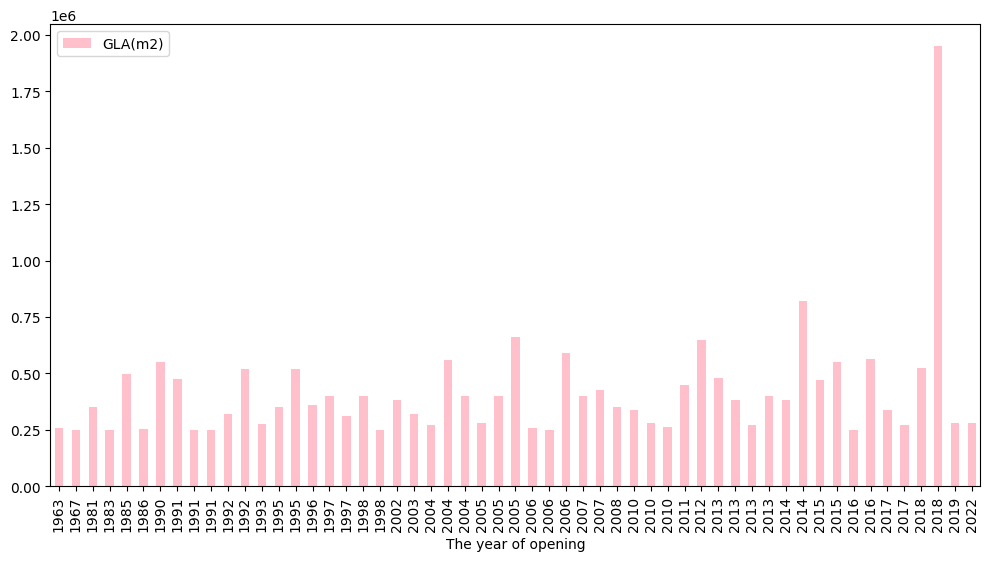

In [30]:
years_gross.plot.bar(x="Year opened", xlabel="The year of opening", color="pink", figsize=(12, 6))

*There is no correlation tendency between the year of opening and GLA. The average mall GLA lies under 500.000 m2, and we can observe arbitrary buildings over that value since 1963.* 

### 3.2) Which countries have the biggest amount of the malls and shops, and total GLA?

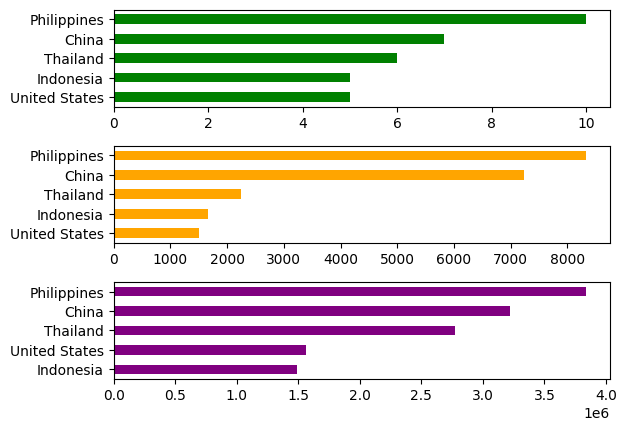

In [31]:
fig, ax = plt.subplots(3, 1, )
data["Malls"][:5].sort_values().plot.barh(ax=ax[0], color="green")
data["Shops"][:5].sort_values().plot.barh(ax=ax[1], color="orange")
data["GLA(m2)"][:5].sort_values().plot.barh(ax=ax[2], color="purple")
fig.subplots_adjust(hspace=0.4)

*Absolute dominants by three parameters are the Philippines, China, Thailand, Indonesia, and the United States. The last two countries have minor differences in the number of shops, and GLA parameters while having equal mall amounts. Others have a steady correlation.*

### 3.3) How does the mall amount correlate with the shop amount?  

<AxesSubplot:>

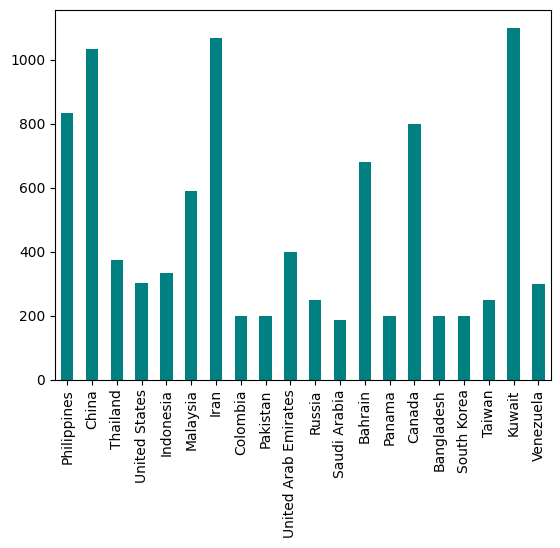

In [32]:
data["Mall&Shop"] = data["Shops"] / data["Malls"]
data["Mall&Shop"].plot.bar(color="#008080")

*By the average number of shops in one mall, only the Philippines and China left from the previous top. Iran and Kuwait have slightly high value in this correlation. Canada, Bahrain, and Malaysia also have significantly higher correlation values among other countries.*  

### 3.4) How does the mall amount correlate with GLA by country?

<AxesSubplot:>

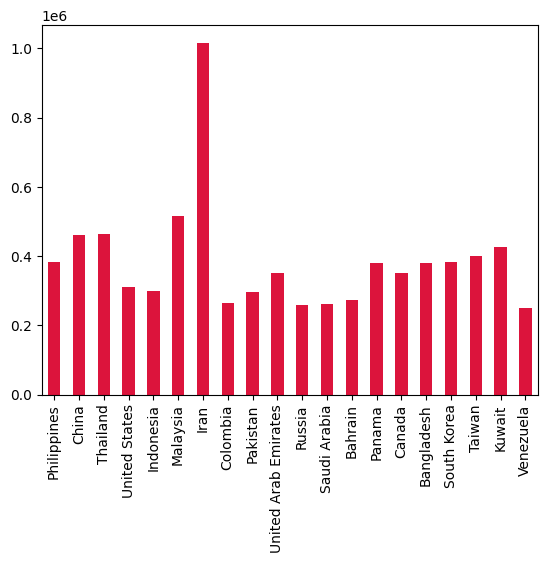

In [33]:
data["Mall&GLA"] = data["GLA(m2)"] / data["Malls"]
data["Mall&GLA"].plot.bar(color="#DC143C")

*The absolute leader in this metric is Iran. Malaysia, China, Thailand, and Kuwait have higher values by countries.*  

# 4) Conclusion.

*The absolute leader by all metrics is China. The country is balanced by the average shops per mall and the average mall area within the country. There is no info about the kind of shops so the conclusion is quite unclear. The Philippines has a lower average GLA per mall but is also dominated by other factors. Other countries that dominate by standard metrics are Thailand, Indonesia, and the United States. Also, remarkable countries are Iran, Kuwait, and Malaysia which are not present at the general top but dominate in correlation metrics. The correspondence of mall locations within country is unexplored.*